### Quick EDA

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

In [35]:
df = catalog.load("insurance")
df.head()

[12/20/23 17:19:56] INFO     Loading data from insurance (CSVDataset)...                        ]8;id=11632;file:///usr/local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=25512;file:///usr/local/lib/python3.10/site-packages/kedro/io/data_catalog.py#482\482]8;;\

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data does not have misssing data

In [37]:
df[['sex', 'smoker', 'region']].nunique()


sex       2
smoker    2
region    4
dtype: int64

`'sex', 'smoker', 'region'` features has several categories, while `'age', 'bmi', 'children'` are numeric ones.

Print the categories

In [38]:
df.sex.value_counts().index.tolist(), \
df.smoker.value_counts().index.tolist(), \
df.region.value_counts().index.tolist()

(['male', 'female'], ['no', 'yes'], ['southeast', 'southwest', 'northwest', 'northeast'])

In [39]:
cat_features = ['sex', 'smoker', 'region']
num_features = ['age', 'bmi', 'children']


This is the regression task. Let's define the target.

In [43]:
target = ['charges']


In [44]:
df_cat_features = pd.get_dummies(df[cat_features]).astype(int)

Check distribution of num_features and target


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

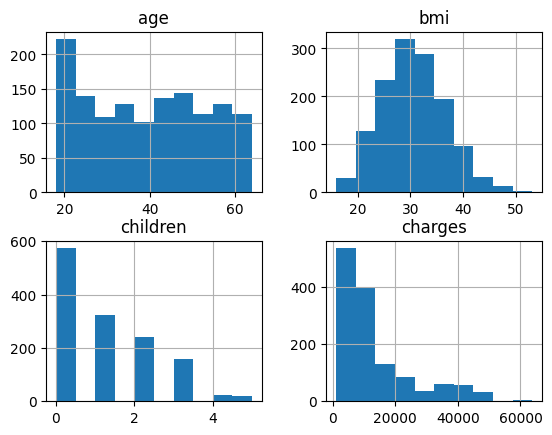

In [45]:
df[num_features+target].hist()